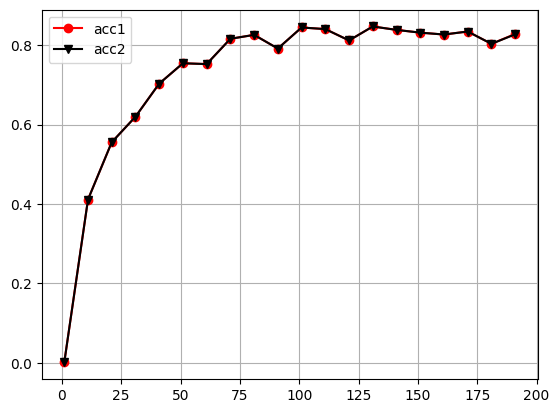

In [3]:
import pickle
import matplotlib.pyplot as plt

result_path = 'C:/Shrink/data/result/result_10_18_09_59.data'

with open(result_path, 'rb') as f:
    result = pickle.load(f)
acc1 = []
acc2 = []
for i in range(len(result)):
    ac1 = [j[2][4] for j in result[i][1:]]
    ac2 = [j[2][5] for j in result[i][1:]]
    acc1.append(max(ac1))
    acc2.append(max(ac2))

y = acc1
x = [result[i][0] for i in range(len(y))]
plt.plot(x, y, marker='o', color='red', label='acc1')
plt.legend()

y = acc2
x = [result[i][0] for i in range(len(y))]
plt.plot(x, y, marker='v', color='black', label='acc2')
plt.legend()

plt.grid()
plt.show()

In [4]:
maxacc1 = max(acc1)
ind_maxacc1 = acc1.index(maxacc1)
maxacc2 = max(acc2)
ind_maxacc2 = acc2.index(maxacc2)
a = result[ind_maxacc1]
b = result[ind_maxacc2]
# c = result[157]

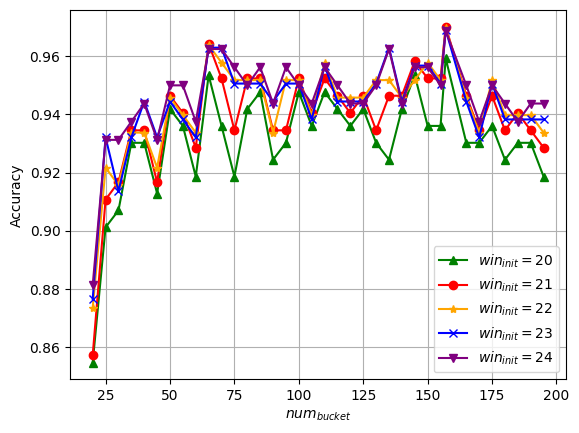

In [2]:
ticks = [i for i in range(20, 199, 5)]
ticks[28] = 157
x = ticks

y = []
for j in ticks:
    y.append(result[j][338][2][5])
plt.plot(x, y, marker='^', color='green', label='$win_{init}=20$')
plt.legend()

y = []
for j in ticks:
    y.append(result[j][347][2][5])
plt.plot(x, y, marker='o', color='red', label='$win_{init}=21$')
plt.legend()

y = []
for j in ticks:
    y.append(result[j][355][2][5])
plt.plot(x, y, marker='*', color='orange', label='$win_{init}=22$')
plt.legend()

y = []
for j in ticks:
    y.append(result[j][362][2][5])
plt.plot(x, y, marker='x', color='blue', label='$win_{init}=23$')
plt.legend()

y = []
for j in ticks:
    y.append(result[j][368][2][5])
plt.plot(x, y, marker='v', color='purple', label='$win_{init}=24$')
plt.legend()

plt.xlabel('$num_{bucket}$')
plt.ylabel('Accuracy')
plt.grid()
plt.draw()
plt.savefig('D:/project/quic_video_clawer/data/fig/result/Acc under different win_init and num_bucket.pdf')

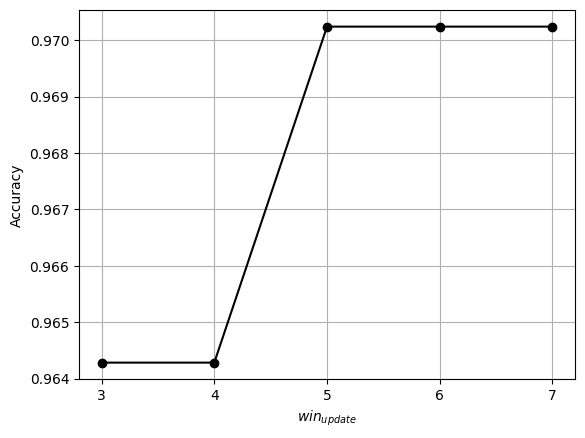

In [3]:
x = [3, 4, 5, 6, 7]
y = [result[157][345][2][5], result[157][346][2][5], result[157][347][2][5], result[157][348][2][5], result[157][349][2][5]]
plt.plot(x, y, marker='o', color='black')
plt.xlabel('$win_{update}$')
plt.ylabel('Accuracy')
plt.xticks(x)
plt.grid()
plt.draw()
plt.savefig('D:/project/quic_video_clawer/data/fig/result/Acc under different win_update.pdf')

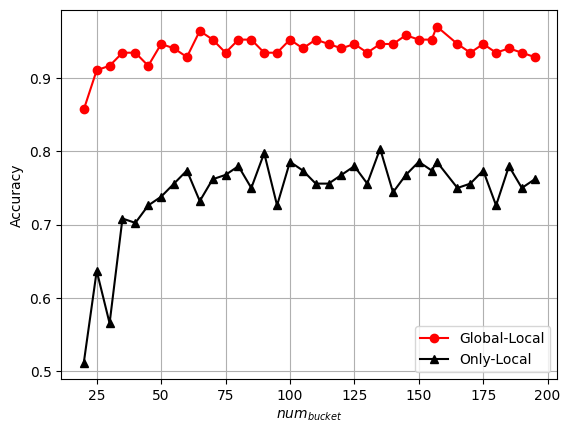

In [4]:
import random

ticks = [i for i in range(20, 199, 5)]
ticks[28] = 157
x = ticks

y1 = []
for j in ticks:
    y1.append(result[j][347][2][5])
plt.plot(x, y1, marker='o', color='red', label='Global-Local')
plt.legend()

with open('D:/project/quic_video_clawer/data/result/result_06_14_18_21.data', 'rb') as f:
    result = pickle.load(f)

y2 = []
for j in ticks:
    y2.append(result[j][347][2][5])
plt.plot(x, y2, marker='^', color='black', label='Only-Local')
plt.legend()

plt.xlabel('$num_{bucket}$')
plt.ylabel('Accuracy')
plt.grid()
plt.draw()
plt.savefig('D:/project/quic_video_clawer/data/fig/result/Ablation experiment diagram of global matching probability.pdf')

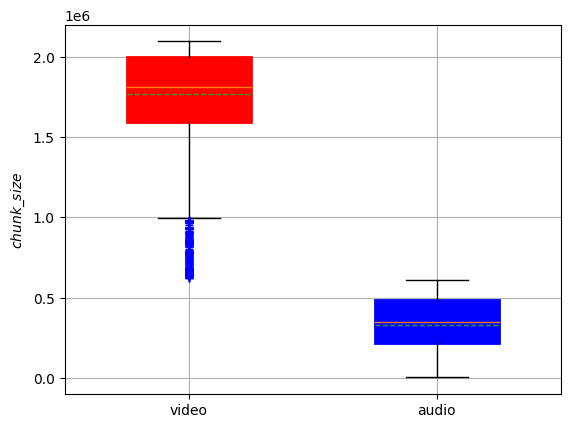

In [5]:
import csv
import matplotlib.pyplot as plt

with open('D:/project/quic_video_clawer/data/fingerprint/finger.csv', 'r') as f:
    reader = csv.reader(f)
    txt = list(reader)
all_chunk = []
for line in txt:
    chunk = line[4].split('/')[1:]
    all_chunk = all_chunk + [int(i) for i in chunk]
video = [i for i in all_chunk if i > 600 * 1024]
audio = [i for i in all_chunk if i < 600 * 1024]

list1 = [video, audio]
c_list = ['red', 'blue']
f = plt.boxplot(list1, vert=True, sym='+b',  showmeans=True, meanline=True, patch_artist=True, widths=0.5)
for box, c in zip(f['boxes'], c_list):
    box.set(color=c, linewidth=2)
    box.set(facecolor=c)
plt.xticks([1, 2], ['video', 'audio'])
plt.ylabel('$chunk\_size$')
plt.grid()
plt.draw()
# plt.savefig('D:/project/quic_video_clawer/data/fig/result/Video and audio chunk size box.pdf')

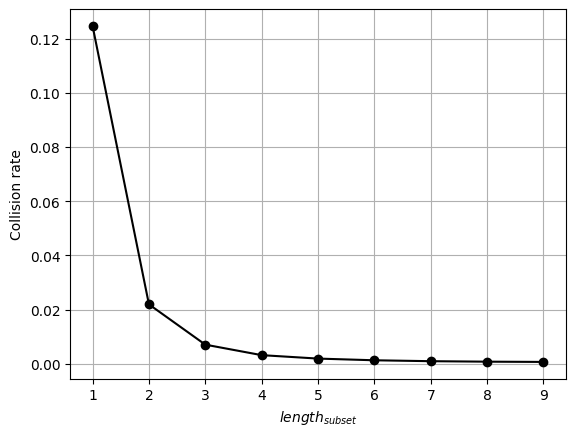

In [6]:
import math

with open('D:/project/quic_video_clawer/data/fingerprint/finger.csv', 'r') as f:
    reader = csv.reader(f)
    txt = list(reader)
video = []
for line in txt:
    chunk = line[4].split('/')[1:]
    video.append([int(i) for i in chunk if int(i) > 600 * 1024])

x = []
y = []
all = 0
for h in range(1, 10):
    x.append(h)
    count = 0
    for i in range(len(video) - 1):
        for j in range(len(video[i]) - h + 1):
            all = all + 1
            for k in range(i + 1, len(video)):
                if set(video[i][j:j + h]).issubset(video[k]):
                    count = count + 1
                    break
    y.append(count / all)

plt.plot(x, y, marker='o', color='black')
plt.xlabel('$length_{subset}$')
plt.ylabel('Collision rate')
plt.xticks(x)
plt.grid()
plt.draw()
plt.savefig('D:/project/quic_video_clawer/data/fig/result/Collision rate between video fingerprints.pdf')